In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [89]:
df = pd.read_csv(r'/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130797,79434,-5.466097,2.517599,-2.343553,4.215289,-3.280618,-0.287955,-2.296688,3.464467,-2.399703,-0.060302,-2.114483,0.462967,0.038225,2.754760,0.367194,2.155235,0.816659,0.324214,-0.844215,-1.599122,0.359007,-0.339049,0.336488,0.373767,-0.522598,-0.237532,-2.033451,-0.874593,39.32,0.0
130798,79434,-0.400431,1.081795,1.398292,-0.004797,-0.018701,-0.773994,0.616732,0.061465,-0.666232,-0.343564,1.665931,0.665691,-0.022331,-0.216380,0.180755,0.520734,-0.167203,0.293220,0.121510,0.119696,-0.198177,-0.540952,0.001058,0.483626,-0.218053,0.041827,0.241530,0.090224,4.49,0.0
130799,79435,-0.061008,-0.744399,1.800945,-2.150292,-1.040646,0.448124,-0.344005,-0.007536,-2.311161,1.266455,1.088743,-0.527679,0.698368,-0.658549,0.210966,-0.319576,0.172076,0.595705,-0.260115,-0.042999,0.059198,0.617976,-0.030908,-0.313231,-0.141417,-0.142070,-0.096524,-0.202511,79.00,0.0
130800,79435,1.064540,-0.651524,0.504264,-0.180169,-0.255126,1.240949,-0.660998,0.327149,0.820702,-0.402905,0.142761,1.626029,1.477641,-0.663102,-0.791246,0.126783,-0.396479,-0.299598,0.873767,0.197927,-0.178904,-0.367111,-0.159203,-1.226536,0.230462,1.026093,-0.029286,0.004010,89.99,0.0


In [90]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [91]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130802.000000,130801.000000,130801.000000,130801.000000,130801.000000,130801.000000,130801.000000
mean,49788.355690,-0.245796,0.001574,0.676860,0.144168,-0.285630,0.080685,-0.117838,0.062334,-0.084914,-0.019197,0.217028,0.005343,-0.016098,0.033649,0.219031,-0.007520,0.047471,-0.087828,-0.019003,0.042058,-0.037485,-0.115544,-0.034350,0.012048,0.130975,0.023770,0.000779,0.002305,92.491840,0.001995
std,20019.335232,1.823485,1.619337,1.276232,1.328394,1.314929,1.284704,1.173648,1.211108,1.094789,1.051186,1.050910,1.038320,1.007331,0.927058,0.928530,0.882774,0.895694,0.836103,0.809684,0.728446,0.721902,0.635884,0.602904,0.594216,0.438352,0.492083,0.391831,0.311492,250.808036,0.044625
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36926.250000,-1.016281,-0.575183,0.173437,-0.714826,-0.908084,-0.659435,-0.604887,-0.132459,-0.713522,-0.489393,-0.542654,-0.397812,-0.678103,-0.343492,-0.322145,-0.477151,-0.407195,-0.554336,-0.508544,-0.169832,-0.225430,-0.544196,-0.172651,-0.323707,-0.135029,-0.325914,-0.060238,-0.004087,6.200000,0.000000
50%,51566.000000,-0.258119,0.093828,0.752911,0.170646,-0.317848,-0.173610,-0.067009,0.078867,-0.148027,-0.095500,0.131677,0.152051,-0.020485,0.062208,0.330212,0.071328,-0.016237,-0.086546,-0.020730,-0.026594,-0.058491,-0.092258,-0.045921,0.068546,0.168214,-0.066478,0.011631,0.023604,24.540000,0.000000
75%,66518.000000,1.158111,0.762659,1.367887,1.001349,0.236866,0.467422,0.409124,0.370385,0.497156,0.429909,1.035749,0.641807,0.648484,0.460584,0.889140,0.534275,0.437581,0.386236,0.477924,0.165510,0.115042,0.303347,0.082633,0.408293,0.419739,0.289216,0.086277,0.077136,82.700000,0.000000
max,79435.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [92]:
nan_values = df.isna().sum()
print("Number of NaN values in each column:\n", nan_values)

Number of NaN values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  

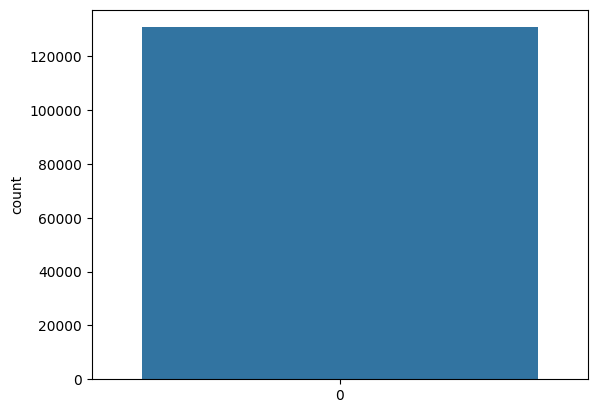

In [93]:
print(df.columns)
sns.countplot(df['Class'])
print(df.head())


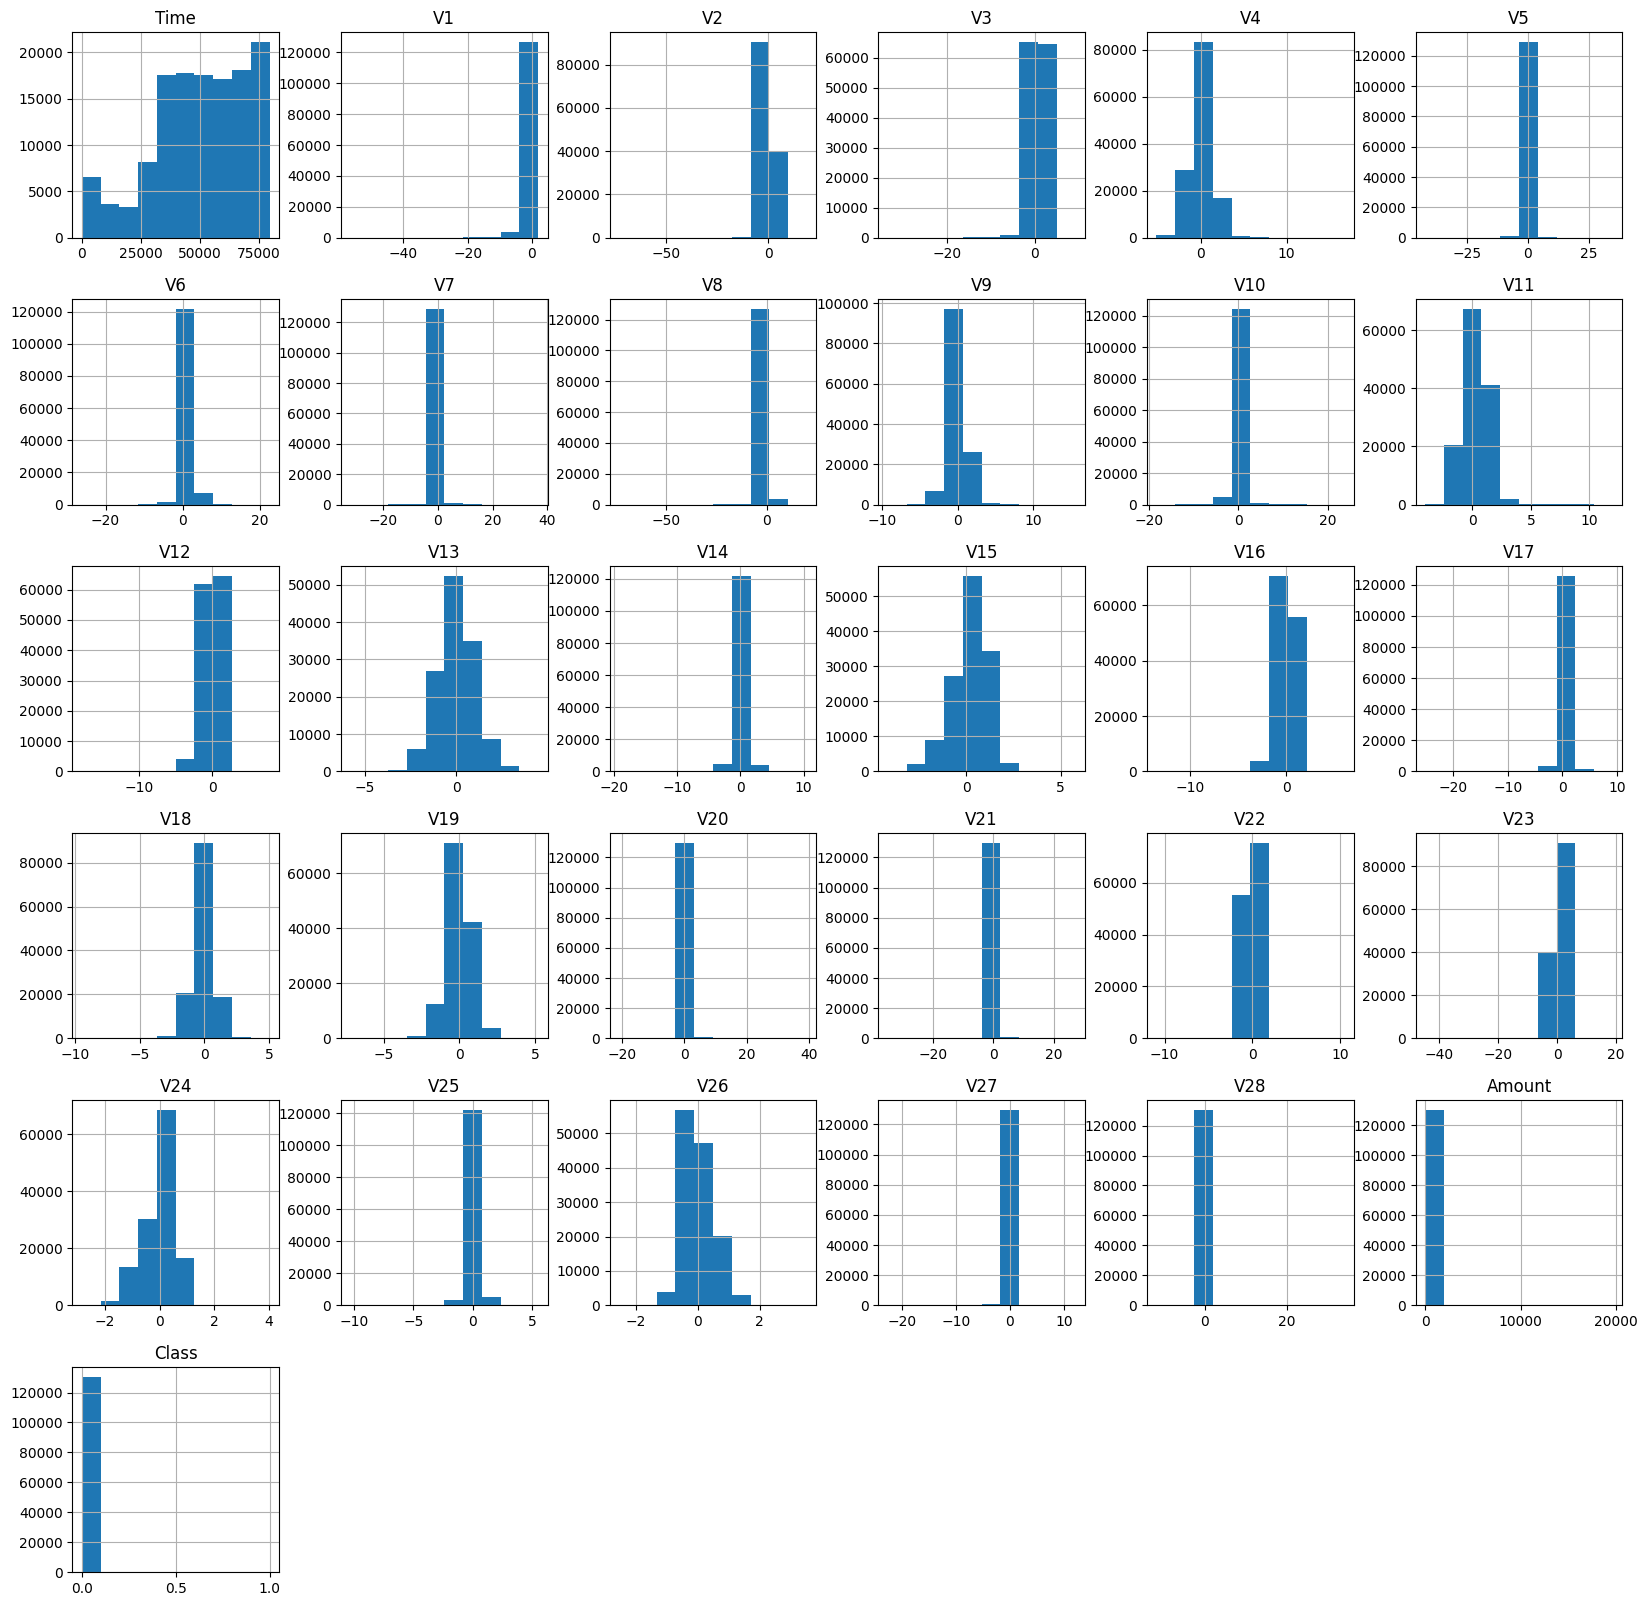

In [94]:
df.hist(figsize=(20,20))
plt.show()

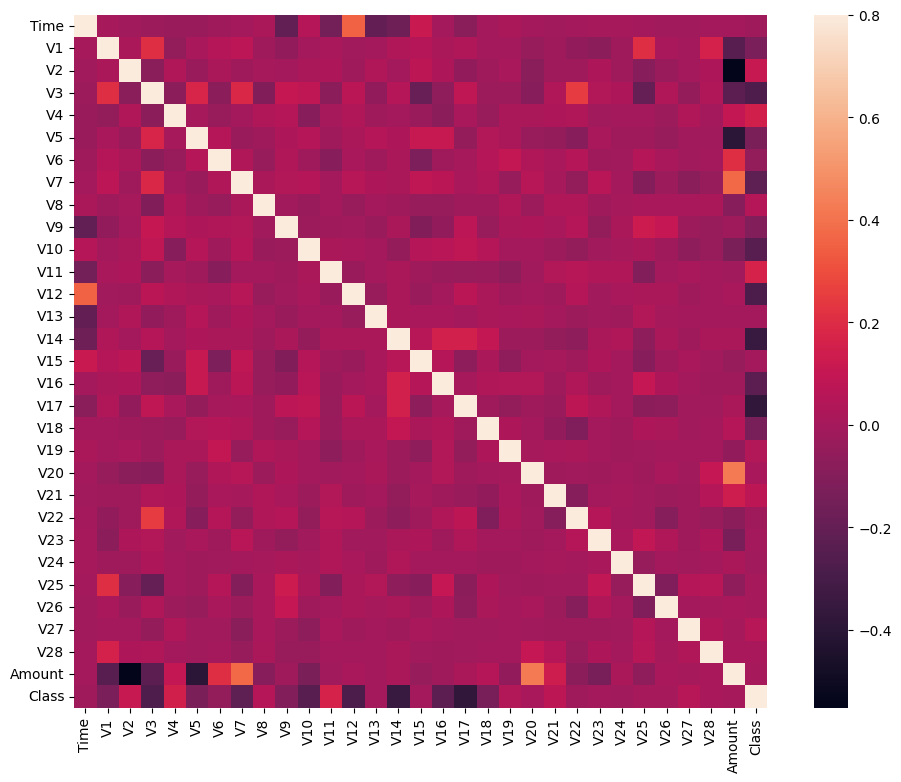

In [95]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.show()

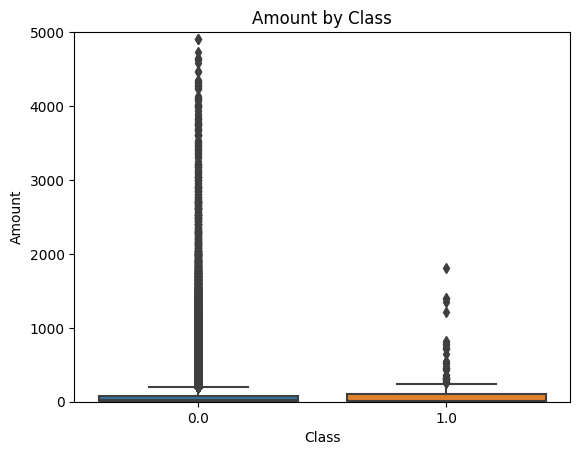

In [96]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.ylim(0, 5000)  # Limiting display range for better visibility
plt.show()


In [97]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

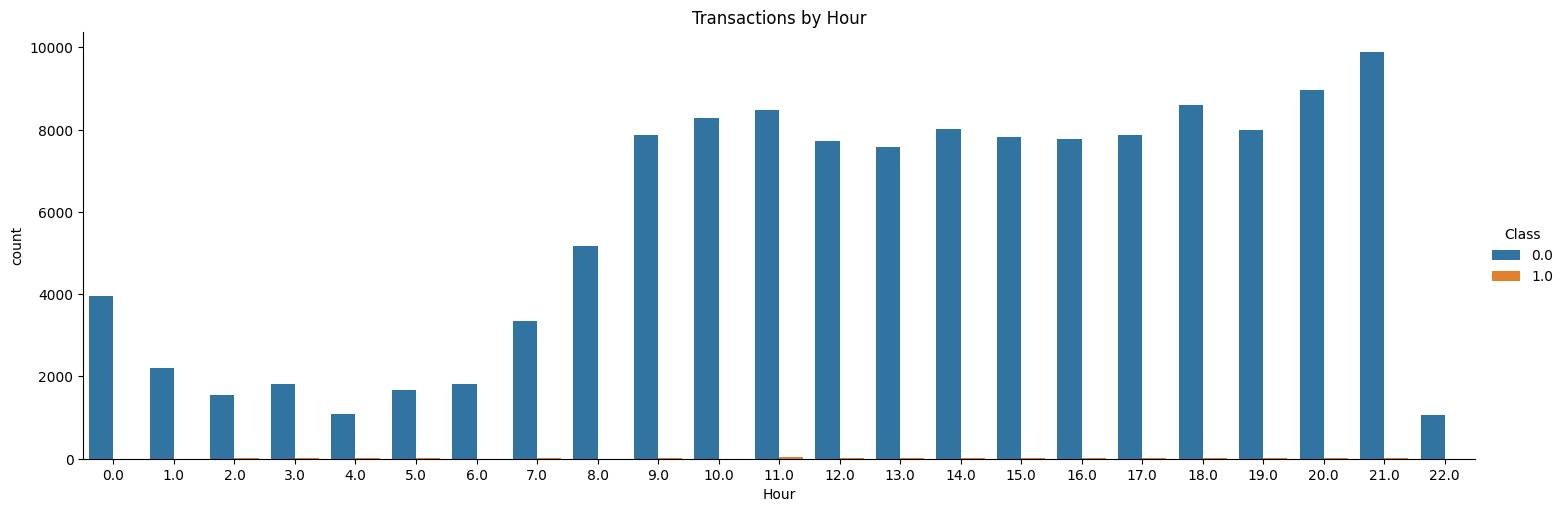

In [98]:
sns.catplot(x='Hour', data=df, kind='count', hue='Class', height=5, aspect=3)
plt.title('Transactions by Hour')
plt.show()

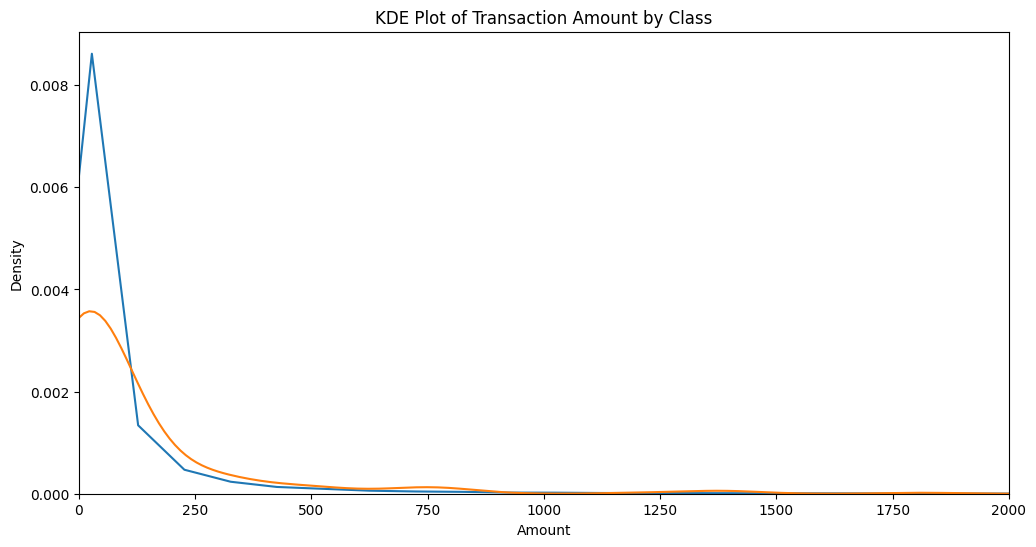

In [99]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Class 0')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Class 1')
plt.title('KDE Plot of Transaction Amount by Class')
plt.xlim(0, 2000)  # Limiting x-axis for better readability
plt.show()

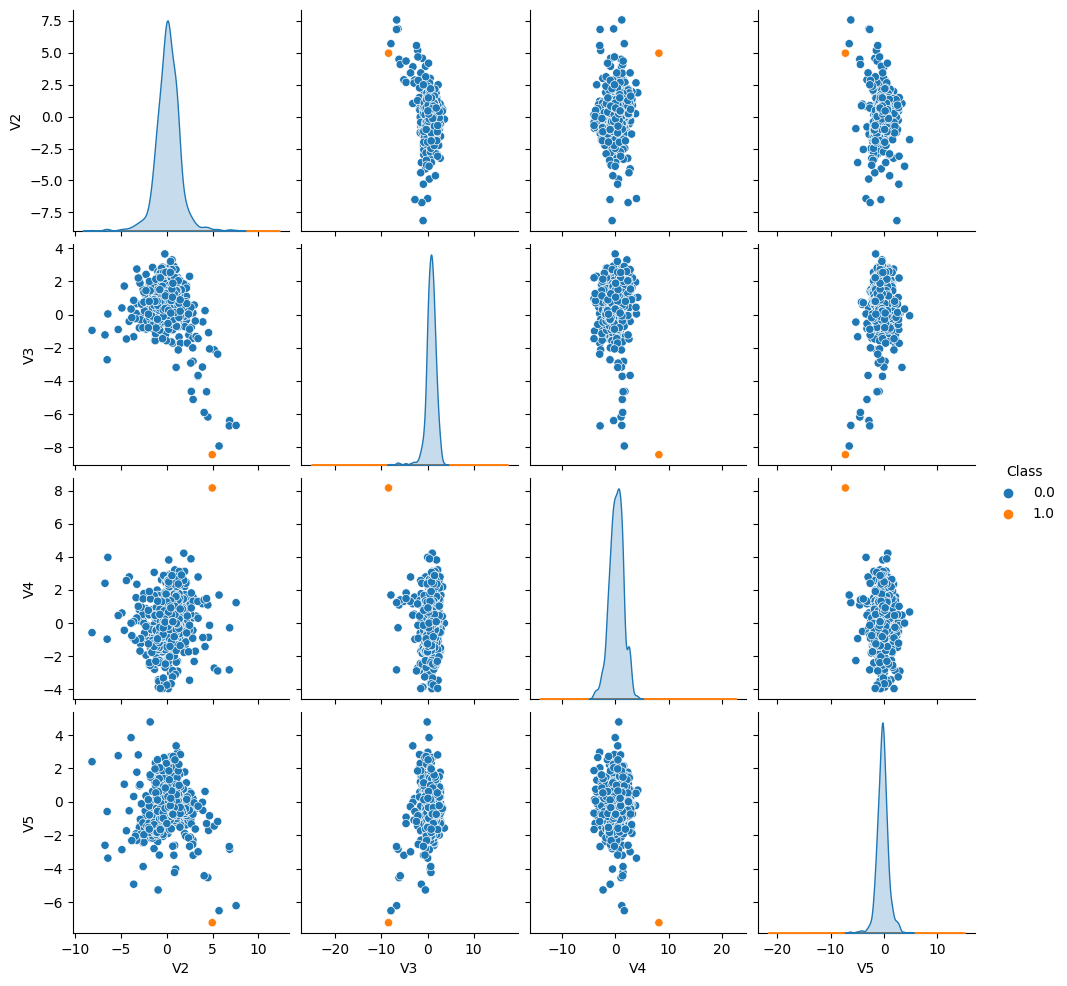

In [100]:
subset_of_features = ['V2', 'V3', 'V4', 'V5', 'Class']  # Example subset
sns.pairplot(df.sample(1000)[subset_of_features], hue='Class', diag_kind='kde')
plt.show()

Data Splitting and Model Training

In [101]:
X = df.drop('Class', axis=1) # Features
y = df['Class'] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
import numpy as np

nan_indices = np.isnan(y_train)
print(np.sum(nan_indices))



1


In [103]:
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]


In [104]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


Model Training and Evaluation

In [105]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_res, y_train_res)

y_pred = rf_classifier.predict(X_test)

In [106]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[26092     4]
 [   11    54]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26096
         1.0       0.93      0.83      0.88        65

    accuracy                           1.00     26161
   macro avg       0.97      0.92      0.94     26161
weighted avg       1.00      1.00      1.00     26161



In [107]:
cv_scores = cross_val_score(rf_classifier, X_train_res, y_train_res, cv=5, scoring='f1_macro')

print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")

Cross-validated F1 scores: [0.99992819 0.99980851 0.99983245 0.99997606 0.99990425]
Mean F1 score: 0.999889893627049


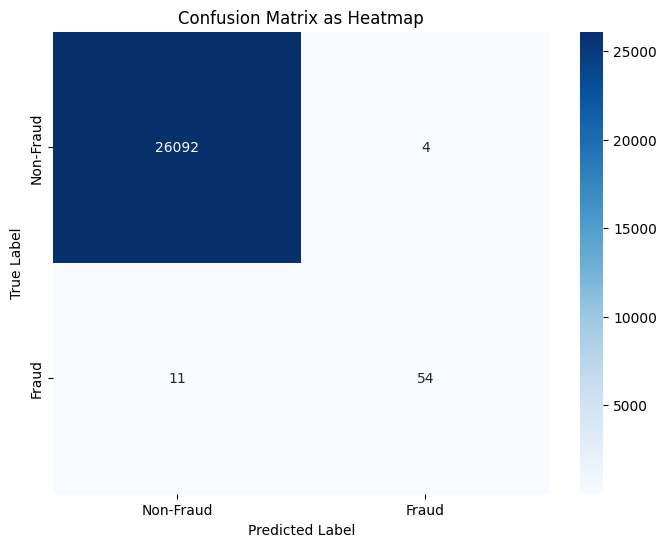

In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix as Heatmap')
plt.show()

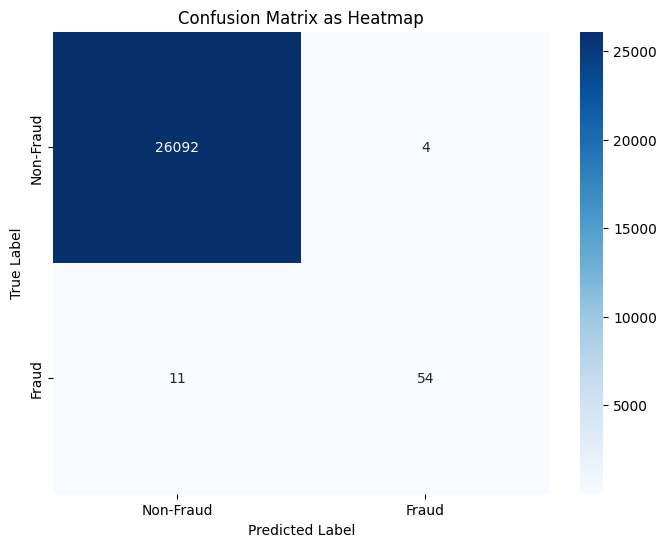

In [109]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix as Heatmap')
plt.show()

In [110]:
cv_scores = cross_val_score(rf_classifier, X_train_res, y_train_res, cv=5, scoring='f1_macro')

# Output the results
print(f'Cross-validated F1 scores for each fold: {cv_scores}')
print(f'Average cross-validated F1 score: {cv_scores.mean()}')

Cross-validated F1 scores for each fold: [0.99992819 0.99980851 0.99983245 0.99997606 0.99990425]
Average cross-validated F1 score: 0.999889893627049


In [111]:
from sklearn.model_selection import cross_validate
# Additional cross-validation using cross_validate for multiple metrics
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_classifier, X_train_res, y_train_res, cv=5, scoring=scoring_metrics)
print(cv_results)

{'fit_time': array([125.06880617, 126.76557803, 130.6191318 , 131.05783439,
       132.51742554]), 'score_time': array([0.52048063, 0.51556873, 0.80952191, 0.8277142 , 0.80470204]), 'test_accuracy': array([0.99992819, 0.99980851, 0.99983245, 0.99997606, 0.99990425]), 'test_precision_macro': array([0.9999282 , 0.99980858, 0.9998325 , 0.99997606, 0.99990427]), 'test_recall_macro': array([0.99992819, 0.99980851, 0.99983245, 0.99997606, 0.99990425]), 'test_f1_macro': array([0.99992819, 0.99980851, 0.99983245, 0.99997606, 0.99990425])}
